In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import re

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load CSV

In [2]:
gc_members = pd.read_csv('../data/NSS_GreatCare_Members.csv', low_memory=False)
ip_admin = pd.read_csv('../data/NSS_Hospital_Inpatient_Admissions.csv', low_memory=False)
pc_visits = pd.read_csv('../data/NSS_PrimaryCare_Office_Visits.csv', low_memory=False)

## Convert Date Time

In [3]:
ip_admin['Encounter Start Date'] = pd.to_datetime(ip_admin['Encounter Start Date'], format='%Y-%m-%d')
ip_admin['Encounter End Date'] = pd.to_datetime(ip_admin['Encounter End Date'], format='%Y-%m-%d')
pc_visits['Encounter Date'] = pd.to_datetime(pc_visits['Encounter Date'], format='%Y-%m-%d')

In [4]:
ip_admin['Patient ID'].nunique()

4701

In [5]:
gc_members['Patient ID'].nunique()

61519

## Fix Attending Provider

In [6]:
ip_admin['Attending Provider NPI'] = ip_admin['Attending Provider NPI'].map(lambda x: str(x)[:-2])

## Question 1:

In [7]:
ip_admin = ip_admin.sort_values(['Patient ID','Encounter Start Date', 'Encounter End Date'], ascending = (False, True, True))

In [8]:
# ip_admin['time_lapse'] = ip_admin['Encounter End Date'] - ip_admin['Encounter Start Date']

In [9]:
# ip_admin1['diff'] = ip_admin1.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff'] = ip_admin1['diff'].fillna(0)
# ip_admin1['diff_end'] = ip_admin1.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# ip_admin1['diff_end'] = ip_admin1['diff_end'].fillna(0)
# ip_admin1

## Create "Previous End Date" column 
Calculate number of days

In [10]:
# thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)

In [11]:
ip_admin['Previous End Date'] = (ip_admin.groupby('Patient ID')['Encounter End Date'].shift(1))
ip_admin['Days Since Last Visit'] = ip_admin['Encounter Start Date'] - ip_admin['Previous End Date']
admin_ct = len(ip_admin)
admin_ct

6213

#### Filter For Readmission

In [115]:
first = ip_admin
first = first[first['Days Since Last Visit'].notnull()]
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']
# ip_admin_under_30 = first[first['Days Since Last Visit'] < '30 days']
ip_between = first[first['Days Since Last Visit'].between('0 days', '30 days', inclusive=True)]
# ip_between.info()

#### Subsetting Data in case we want to use less columns

In [15]:
ip_between1 = ip_between
ip_between1 = ip_between[['Patient ID', 'Encounter Start Date', 'Encounter End Date', 'Previous End Date', 'Days Since Last Visit']]
# ip_between1.head()

##### Count of Unique Patient IDs

In [16]:
#numerator
# ip_between['Patient ID'].nunique()

In [17]:
#denomenator
# ip_admin['Patient ID'].nunique()

In [18]:
#count of unique patient ids
# (ip_between['Patient ID'].nunique() / ip_admin['Patient ID'].nunique()) * 100

##### Readmissions between 0 and 30 days. Use this

In [19]:
#numerator
ip_between['Patient ID'].count()

703

In [20]:
#denomenator
ip_admin['Patient ID'].count()

6213

In [21]:
#count of days between 0 and 30
round((ip_between['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

11.315

11.315%

Brenda's Code

In [22]:
# #make df(patient, start date, end date)
# one = adm[['Patient ID','Encounter Start Date','Encounter End Date']]
# #set datetime
# one['Encounter Start Date'] = pd.to_datetime(one['Encounter Start Date'], format='%Y-%m-%d')
# one['Encounter End Date'] = pd.to_datetime(one['Encounter End Date'], format='%Y-%m-%d')
# #order by patient then start date
# one = one.sort_values(['Patient ID',"Encounter Start Date", "Encounter End Date"], ascending = (False, True, True))
# #if difference between Encounter End Date and Encounter Start Date < 30
# one['diff'] = one.groupby('Patient ID')['Encounter Start Date'].diff() / np.timedelta64(1, 'D')
# one['diff'] = one['diff'].fillna(0)
# one['diff_end'] = one.groupby('Patient ID')['Encounter End Date'].diff() / np.timedelta64(1, 'D')
# one['diff_end'] = one['diff_end'].fillna(0)
# one

### Bucket By Month<br>
For graphing purposes

In [23]:
ip_admin2 = ip_between
ip_admin2['year'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).year
ip_admin2['month'] = pd.DatetimeIndex(ip_admin2['Previous End Date']).month

ip_admin2.head()

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Encounter ID,Patient ID,Encounter Primary Payor ID,Encounter Primary Plan ID,Facility Provider ID,Attending Provider ID,Attending Provider NPI,Facility Provider NPI,Encounter Start Date,Encounter End Date,Is Emergency Department Visit Parent Encounter,Is Observation Stay Parent Encounter,CMS Admit Type Code,CMS Admit Source Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Primary Plan Allowed Amount,Primary Plan Paid Amount,Patient Paid Amount,Previous End Date,Days Since Last Visit,year,month
6211,HIA|DS1|9994|DS1|NPI|1689608150|2,DS1|9994,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1750544516,1750544516,1689608150,2015-11-24,2015-11-27,0,0,2.0,1,1,21.0,NaN,NaN,O42.92,"Full-term premature rupture of membranes, unsp...",0,19919.42,250.0,2015-11-23,1 days,2015,11
6202,HIA|DS1|9943|DS1|NPI|1184722779|2,DS1|9943,DS1|1,DS1|5047X,DS1|NPI|1184722779,DS1|NPI|1942320288,1942320288,1184722779,2013-10-25,2013-10-28,1,0,1.0,1,6,21.0,NaN,NaN,K91.89,Other postprocedural complications and disorde...,0,12277.13,0.0,2013-10-16,9 days,2013,10
6199,HIA|DS1|9935|DS1|NPI|1902803315|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1902803315,DS1|NPI|1972545085,1972545085,1902803315,2011-01-25,2011-01-26,0,0,2.0,4,62,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,13596.10,250.0,2011-01-24,1 days,2011,1
6197,HIA|DS1|9935|DS1|NPI|1366401333|1,DS1|9935,DS1|1,DS1|5047X,DS1|NPI|1366401333,DS1|NPI|1790917086,1790917086,1366401333,2011-01-26,2011-02-07,0,0,2.0,D,6,21.0,NaN,NaN,I63.211,Cerebral infarction due to unspecified occlusi...,0,45890.00,250.0,2011-01-26,0 days,2011,1
6185,HIA|DS1|9809|DS1|NPI|1689608150|2,DS1|9809,DS1|1,DS1|5047W,DS1|NPI|1689608150,DS1|NPI|1821297797,1821297797,1689608150,2013-01-20,2013-01-24,0,0,2.0,1,1,21.0,NaN,NaN,I48.0,Paroxysmal atrial fibrillation,0,10721.07,250.0,2013-01-11,9 days,2013,1


# Question 2

In [33]:
### make df and merge
ad_short = ip_admin[['Patient ID','Encounter End Date']]
pcp_short = pc_visits[['Patient ID','Encounter Date']]
two = pd.merge(ad_short, pcp_short, how='left', on='Patient ID')
# two = ad_cut.merge(pcp_cut, left_on ='Patient ID', right_on = 'Patient ID',how='left', indicator = False)
###sort
two = two.sort_values(['Patient ID',"Encounter Date", "Encounter End Date"], ascending = (False, True, True))
###sub encounter date from end dates
two['Days Since Last Visit'] = two['Encounter Date'] - two['Encounter End Date']
two_between = two[two['Days Since Last Visit'].between('0 days', '7 days', inclusive=True)]
# two_top = two[two['Days Since Last Visit'] <= '7 days']
# two_top = two_top[two_top['Days Since Last Visit'] >= '0 days']
# two_top
len(two_between)

2375

#### Drop Duplicates From PCP

In [34]:
two_between_dups = two_between.sort_values(['Patient ID'], ascending = (False)).drop_duplicates(
                    ['Patient ID','Encounter End Date'])

In [35]:
len(two_between_dups)

1863

#### By Admission

In [36]:
#numerator
two_between_dups['Patient ID'].count()

1863

In [37]:
#denomenator
two['Patient ID'].count()

44098

In [38]:
round((two_between_dups['Patient ID'].count() / ip_admin['Patient ID'].count()) * 100,3)

29.986

29.986%

In [108]:
pc_visits = pc_visits[['Patient ID','Provider Group NPI','Service Provider NPI','Encounter Date','Encounter ID']]
pc_visits['Provider Group NPI'] = pc_visits['Provider Group NPI'].map(lambda x: str(x)[:-2])

In [109]:
pcp_adm=pd.merge(ip_between, pc_visits,how='inner',left_on=['Patient ID'],right_on=['Patient ID'])
pcp_adm=pcp_adm[['Patient ID','Encounter End Date','Provider Group NPI','Service Provider NPI','Encounter Date']]
pcp_adm['Days to PCP Visit']=pcp_adm['Encounter Date'] - pcp_adm['Encounter End Date']
sevendays = pcp_adm[pcp_adm['Days to PCP Visit'].between('0 days', '7 days', inclusive=True)]

In [110]:
sevendays_unique=sevendays.drop_duplicates(subset=['Patient ID','Encounter End Date'],keep='first')

In [111]:
sevendays_unique['Provider Group NPI'] = sevendays_unique['Provider Group NPI'].map(lambda x: str(x)[:-2])
sevendays_unique['Service Provider NPI'] = sevendays_unique['Service Provider NPI'].map(lambda x: str(x)[:-2])

/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/richietownsend/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [113]:
provider_seven = sevendays_unique['Service Provider NPI'].value_counts()
provider_seven = pd.DataFrame(provider_seven).reset_index()
provider_seven.rename(columns={'index': 'Service Provider NPI', 'Service Provider NPI': 'Visits w/in Seven Days'},inplace=True)
provider_seven

,Service Provider NPI,Visits w/in Seven Days
0,1619199791,6
1,1477586873,4
2,1467487181,3
3,1598845638,3
4,1356541502,3
5,1083648380,3
6,1689685281,3
7,1093006595,3
8,1104884337,3
9,1437180965,3


In [114]:
total_pcp = pcp_adm['Service Provider NPI'].value_counts()
total_pcp = pd.DataFrame(total_pcp).reset_index()
total_pcp.rename(columns={'index':'Service Provider NPI', 'Service Provider NPI': 'Total PCP Visits'},inplace=True)
total_pcp

,Service Provider NPI,Total PCP Visits
0,1.972705e+09,170
1,1.619200e+09,168
2,1.164698e+09,124
3,1.598846e+09,105
4,1.720009e+09,93
5,1.184657e+09,84
6,1.235116e+09,70
7,1.477587e+09,67
8,1.235159e+09,61
9,1.396726e+09,61


# Question 3

##### For 30 Day Readmissions

_By Individual Doctor_

_By The Provider Group_

In [39]:
# ip_between.info()

##### filter for number of readmissions per patient

In [118]:
patient_admin = ip_admin['Patient ID'].value_counts()
patient_admin = pd.DataFrame(patient_admin).reset_index()
patient_admin.rename(columns={'index':'Patient ID', 'Patient ID': 'Admission Count'}, inplace=True)
# patient_admin.head()

In [117]:
patient_readmin = ip_between['Patient ID'].value_counts()
patient_readmin = pd.DataFrame(patient_readmin).reset_index()
patient_readmin.rename(columns={'index':'Patient ID', 'Patient ID': 'Readmission Count'}, inplace=True)
# patient_readmin.head()

In [116]:
patient_counts = pd.merge(patient_admin, patient_readmin, on="Patient ID", how='left')
patient_counts['Readmin Rate'] = (patient_counts['Readmission Count'] / patient_counts['Admission Count'])*100
patient_rate = patient_counts.sort_values(by='Readmin Rate', ascending=False)
# patient_rate = patient_rate[patient_rate['Admission Count']]
# patient_rate

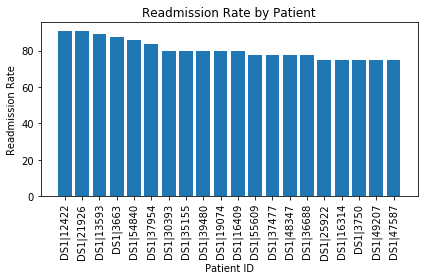

In [83]:
plt.bar('Patient ID', 'Readmin Rate',data=patient_rate.head(20))
plt.xlabel('Patient ID')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rate by Patient')
plt.xticks(rotation=90)
plt.tight_layout()

In [126]:
# read_count_patient = ip_admin2.groupby(['Patient ID'], as_index=False).count()
# read_count_patient = read_count_patient.sort_values(['Patient ID'], ascending = (False))
# read_count_patient_high = read_count_patient[read_count_patient['Encounter ID'] >= 0]
# # read_count_patient_high

##### filter for number of readmissions per Hospital

In [122]:
hospital_admin = ip_admin['Facility Provider NPI'].value_counts()
hospital_admin = pd.DataFrame(hospital_admin).reset_index()
hospital_admin.rename(columns={'index':'Facility Provider NPI', 'Facility Provider NPI':'Admission Count'}, inplace=True)
# hospital_admin.head()

In [121]:
hospital_readmin = ip_between['Facility Provider NPI'].value_counts()
hospital_readmin = pd.DataFrame(hospital_readmin).reset_index()
hospital_readmin.rename(columns={'index':'Facility Provider NPI', 'Facility Provider NPI': 'Readmission Count'}, inplace=True)
# hospital_readmin.head()

In [120]:
hospital_counts = pd.merge(hospital_admin, hospital_readmin, on="Facility Provider NPI", how="inner")
hospital_counts['Readmin Rate'] = (hospital_counts['Readmission Count'] / hospital_counts['Admission Count'])*100
hospital_rate = hospital_counts.sort_values(by='Readmin Rate', ascending=False)
hospital_rate = hospital_rate[hospital_rate['Admission Count'] >= 20]
# hospital_rate

In [119]:
# hospital_readmin.sort_values(by='Facility Provider NPI')

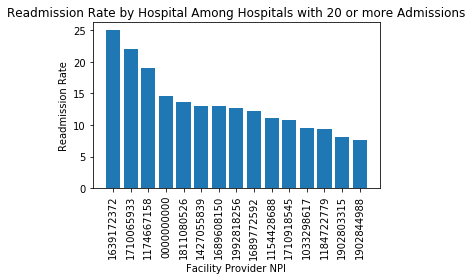

In [64]:
plt.bar('Facility Provider NPI', 'Readmin Rate',data=hospital_rate)
plt.xlabel('Facility Provider NPI')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rate by Hospital Among Hospitals with 20 or more Admissions')
plt.xticks(rotation=90)
plt.tight_layout()

In [27]:
# read_count_hospital = ip_admin2.groupby(['Facility Provider NPI'], as_index=False).count()
# read_count_hospital = read_count_hospital.sort_values(['Patient ID'], ascending = (False))
# read_count_hospital_high = read_count_hospital[read_count_hospital['Encounter ID'] >= 5]
# # read_count_hospital_high

##### filter for number of readmissions per Attendant 

In [123]:
attendant_admin = ip_admin['Attending Provider NPI'].value_counts()
attendant_admin = pd.DataFrame(attendant_admin).reset_index()
attendant_admin.rename(columns={'index':'Attending Provider NPI', 'Attending Provider NPI':'Admission Count'}, inplace=True)
# attendant_admin

In [124]:
attendant_readmin = ip_between['Attending Provider NPI'].value_counts()
attendant_readmin = pd.DataFrame(attendant_readmin).reset_index()
attendant_readmin.rename(columns={'index':'Attending Provider NPI', 'Attending Provider NPI':'Readmission Count'}, inplace=True)
# attendant_readmin

In [125]:
attendant_counts = pd.merge(attendant_admin, attendant_readmin, on="Attending Provider NPI", how="inner")
attendant_counts['Readmin Rate'] = (attendant_counts['Readmission Count'] / attendant_counts['Admission Count'])*100
attendant_rate = attendant_counts.sort_values(by='Readmin Rate', ascending=False)
attendant_rate = attendant_rate[attendant_rate['Admission Count'] > 20]
# attendant_rate.head()

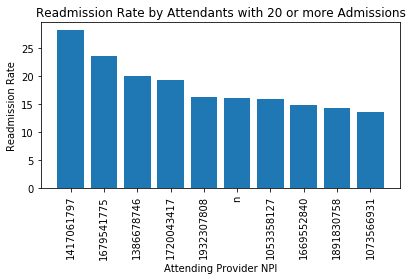

,Attending Provider NPI,Admission Count,Readmission Count,Readmin Rate
4,1417061797,39,11,28.205128
8,1679541775,34,8,23.529412
25,1386678746,25,5,20.000000
14,1720043417,31,6,19.354839
5,1932307808,37,6,16.216216


In [128]:
plt.bar('Attending Provider NPI', 'Readmin Rate',data=attendant_rate.head(10))
plt.xlabel('Attending Provider NPI')
plt.ylabel('Readmission Rate')
plt.title('Readmission Rate by Attendants with 20 or more Admissions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
display(attendant_rate.head())

In [29]:
# read_count_attendant = ip_admin2.groupby(['Attending Provider NPI'], as_index=False).count()
# read_count_attendant = read_count_attendant.sort_values(['Patient ID'], ascending = (False))
# read_count_attendant_high = read_count_attendant[read_count_attendant['Encounter ID'] >= 5]
# # read_count_attendant_high

### Visual

In [30]:
# #filter for number of readmissions per patient
# occurance1 = read_count_patient_high
# bin1 = 9
# #filter for number of readmissions per Hospital
# occurance2 = read_count_hospital_high
# bin2 = 7
# #filter for number of readmissions per Attendant 
# occurance3 = read_count_attendant_high
# bin3 = 7

# _= plt.hist('Encounter ID', bins = bin1, data = occurance1)
# _= plt.title('Distribution of Variables')
# _= plt.ylabel('Count of High Ocurrances')
# _= plt.xlabel('Count of Readmissions')

In [31]:
# # sns.set_theme(style="whitegrid")
# # ax = figsize

# ax = sns.barplot(x='Facility Provider NPI', y='Encounter ID',  data=occurance2)

In [32]:
# #filter for number of readmissions per patient
# measure1 = read_count_patient_high['Patient ID']
# value1 = read_count_patient_high['Encounter ID']
# #filter for number of readmissions per Hospital
# measure2 = read_count_hospital_high['Facility Provider NPI']
# value2 =  read_count_hospital_high['Encounter ID']
# #filter for number of readmissions per Attendant 
# read_count_attendant_high['Attending Provider NPI']= read_count_attendant_high['Attending Provider NPI'].astype(str)
# measure3 = read_count_attendant_high['Attending Provider NPI']
# value3 = read_count_attendant_high['Encounter ID']

# #ax = plt.gca()
# rc={'figure.figsize':(20,15)}
# _=plt.plot(measure2, value2, color = 'red')

##### 7 Day

_By Individual Doctor_

_By The Provider Group_

#### Bucket By Month 

For graphing purposes

## Readmitted in the Same Day 

In [ ]:
first_0 = first[first['Days Since Last Visit'] == '0 days']
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']

In [ ]:
len(first_0)

In [ ]:
first_0

#### By Hospital

In [ ]:
read0_count_hosp = first_0.groupby(['Facility Provider NPI'], as_index=False).count()
read0_count_hosp = read0_count_hosp.sort_values(['Patient ID'], ascending = (False))
# read0_count_hosp_high = read_count_hospital[read_count_hospital['Encounter ID'] >= 5]

In [ ]:
read0_count_hosp.head(3)

#### Hospitals with Multiple Same Day Readmissions Count
1) 1902803315 - 21<br>
2) 1427055839 -17<br>
3) 1184722779 - 16

In [ ]:
UCSF = read0_count_hosp[read0_count_hosp['Facility Provider NPI'] == '1689772592']
UCSF

#### Determining Rate

In [ ]:
#Renaming Thirty Day
thirty_by_hospital = read_count_hospital[['Facility Provider NPI', 'Patient ID']]
thirty_by_hospital.rename(columns = {'Facility Provider NPI' : 'Hospital', 'Patient ID' : 'Readmissions Within 30'}, inplace = True)

In [ ]:
#Renaming Zero Days
zero_day = read0_count_hosp[['Facility Provider NPI', 'Patient ID']]
zero_day.rename(columns = {'Facility Provider NPI' : 'Hospital', 'Patient ID' : 'Same Day Readmissions'}, inplace = True)

In [ ]:
zero_thirty = pd.merge(zero_day, thirty_by_hospital, how="inner", on="Hospital")
zero_thirty['Rate'] = zero_thirty['Same Day Readmissions'] / zero_thirty['Readmissions Within 30'] *100
zero_thirty = zero_thirty[zero_thirty['Readmissions Within 30'] >= 20]
zero_thirty = zero_thirty.sort_values(['Rate'], ascending=False)
zero_thirty

## Healthcare Plan for Frequent Fliers

In [ ]:
in_mem = pd.merge(ip_admin, gc_members, how='left', on='Patient ID')

In [ ]:
in_mem_short = in_mem[['Patient ID', 'Encounter Start Date', 'Encounter End Date', 'Previous End Date', 'Days Since Last Visit', 'Patient Age Integer','Primary Plan Description']]

In [ ]:
in_mem_short

In [ ]:
ims = in_mem_short
ims = ims[ims['Days Since Last Visit'].notnull()]
# ip_admin_30 = first[first['Days Since Last Visit'] <= '30 days']
# ip_admin_under_30 = first[first['Days Since Last Visit'] < '30 days']
ims_between = ims[ims['Days Since Last Visit'].between('0 days', '30 days', inclusive=True)]
ims_between.head()

In [ ]:
len(ims_between)

In [ ]:
ims_between['Primary Plan Description'].value_counts()

# Using Debbie's Data to reconcile Q1

In [ ]:
adm = pd.read_csv('../data/NSS_Hospital_Inpatient_Admissions.csv', low_memory=False)
members = pd.read_csv('../data/NSS_GreatCare_Members.csv', low_memory=False)

In [ ]:
thirtyadm = adm[['Patient ID','Facility Provider ID','Encounter Start Date','Encounter End Date']]

In [ ]:
##renaming columns to be one "word"
thirtyadm.columns = ['patient_id','facility_id','start_date','end_date']

In [ ]:
thirtyadm['next_adm']=thirtyadm.sort_values(by=['start_date'],ascending=True).groupby(['patient_id'])['start_date'].shift(-1)

In [ ]:
thirtyadm['start_date'] = pd.to_datetime(thirtyadm['start_date'], format='%Y-%m-%d')
thirtyadm['end_date'] = pd.to_datetime(thirtyadm['end_date'], format='%Y-%m-%d')
thirtyadm['next_adm'] =  pd.to_datetime(thirtyadm['next_adm'], format='%Y-%m-%d')
adm['Encounter Start Date']=pd.to_datetime(adm['Encounter Start Date'])

In [ ]:
thirtyadm['diff']=thirtyadm['next_adm'] - thirtyadm['end_date']
thirtyadm

In [ ]:
pt_readmitted=thirtyadm
# pt_readmitted=thirtyadm.dropna()
# pt_readmitted

In [ ]:
pt_readmitted=pt_readmitted[pt_readmitted['diff']>='0 days']

In [ ]:
pt_readm_thirty=pt_readmitted[pt_readmitted['diff']<= '30 days']
pt_readm_thirty

In [ ]:
pt_readm_thirty.count()

In [ ]:
ip_between.info()

In [ ]:
reconciliation = pd.merge(ip_between, pt_readm_thirty, left_on="Patient ID", right_on='patient_id', how='left')

In [ ]:
ip_between.count()

In [ ]:
pt_readm_thirty.count()

In [ ]:
reconcile = ip_between[(~ip_between['Patient ID'].isin(pt_readm_thirty['patient_id']))]
# pd.set_option('display.max_rows', None)

# n_freq_flyers = hireadmin_between365[(~hireadmin_between365['Patient ID'].isin(hireadmin_between30['Patient ID']))]
# # pd.set_option('display.max_rows', None)
# n_freq_flyers

In [ ]:
reconcile

In [ ]:
# reconciliation

In [ ]:
reconciliation2 = reconciliation[['Patient ID', 'Previous End Date', 'Encounter Start Date', 'Encounter End Date', 'Days Since Last Visit', 'start_date', 'end_date', 'next_adm', 'diff' ]]

In [ ]:
reconciliation2

In [ ]:
ip_between[ip_between["Patient ID"] == 'DS1|47885']

In [ ]:
pt_readm_thirty[pt_readm_thirty["patient_id"] == 'DS1|47885']

In [ ]:
ip_admin[ip_admin['Patient ID'] == 'DS1|6964']

In [ ]:
mem_adm=pd.merge(members,adm,how='left',left_on=['Patient ID'],right_on=['Patient ID'])
# mem_adm

In [ ]:
mem_adms=mem_adm[['Patient ID','Encounter Start Date']]

In [ ]:
freq_fliers=mem_adms.groupby(['Patient ID']).count()

In [ ]:
freq_fliers['Encounter Start Date'].mean().sort_values('Encounter Start Date',ascending=False)

In [ ]:
freq_fliers['Encounter Start Date'].mean()

In [ ]:
freq_fliers=freq_fliers[freq_fliers['Encounter Start Date']>7]

In [ ]:
#count of patients who had encounter with hospital more than 7 times 11/10/2009 to 4/28/2019
freq_fliers=freq_fliers.sort_values('Encounter Start Date',ascending=False)

In [ ]:
ax = freq_fliers.plot.barh(rot=0,legend=False,color='#ff9671')
plt.title("Frequent Flyer Patients")
plt.xlabel("Admissions")
plt.ylabel("Patient ID")

In [ ]:
read_count_patient.sort_values(by='Encounter ID', ascending=False)